# Lending Club Overview:


## Lending Club is a marketplace for personal loans that matches borrowers who are seeking a loan with investors looking to lend money and make a return.

## Objective:
    ###  1. Understanding of given Dataset, type of data, relationships
    ###  2. Cleaning up the Dataset, finalizing the data for analysis. Removing missing values, Removing columns which are not relavent. Doing missing value treatment.
    ###  3. Analyzing the Dataset, with independent columns and the dependent. Uni and Bi Varaint Analysis.
    ###  4. Providing recommendations for Lending Club marketplace
    

## Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import warnings
import plotly.graph_objects as go
from datetime import datetime
warnings.filterwarnings('ignore')

## Dataloading

In [2]:
loan_df = pd.read_csv('loan.csv')

In [3]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


### Dataset has 111 columns and 39717 rows. Sample we can see below:

In [4]:
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


Below are few important Columns for ananlysis
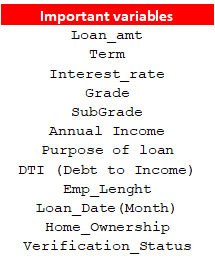

Below are the customer behaviour columns, the customer behavior variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

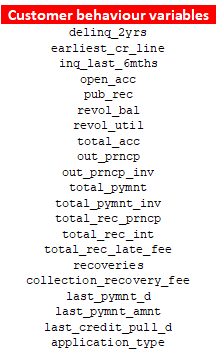

## Data Cleaning

In [5]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [6]:
Total_rows = len(loan_df) #total rows

In [7]:
# percentage of missing values in each column
round(loan_df.isnull().sum()/Total_rows, 2)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.0
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

### Identify the columns which has complete missing - 100% missing values

In [8]:
missing_columns = loan_df.columns[100*(loan_df.isnull().sum()/len(loan_df)) == 100]
print(missing_columns)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

### Drop the missing values
### As we can see below: Number of columns reduced to 57 from earlier 111 

In [9]:
loan_df2 = loan_df.drop(missing_columns, axis=1)
print(loan_df2.shape)


(39717, 57)


### Using Missing no library to identify if any more missing value and understand the correlations 

<AxesSubplot:>

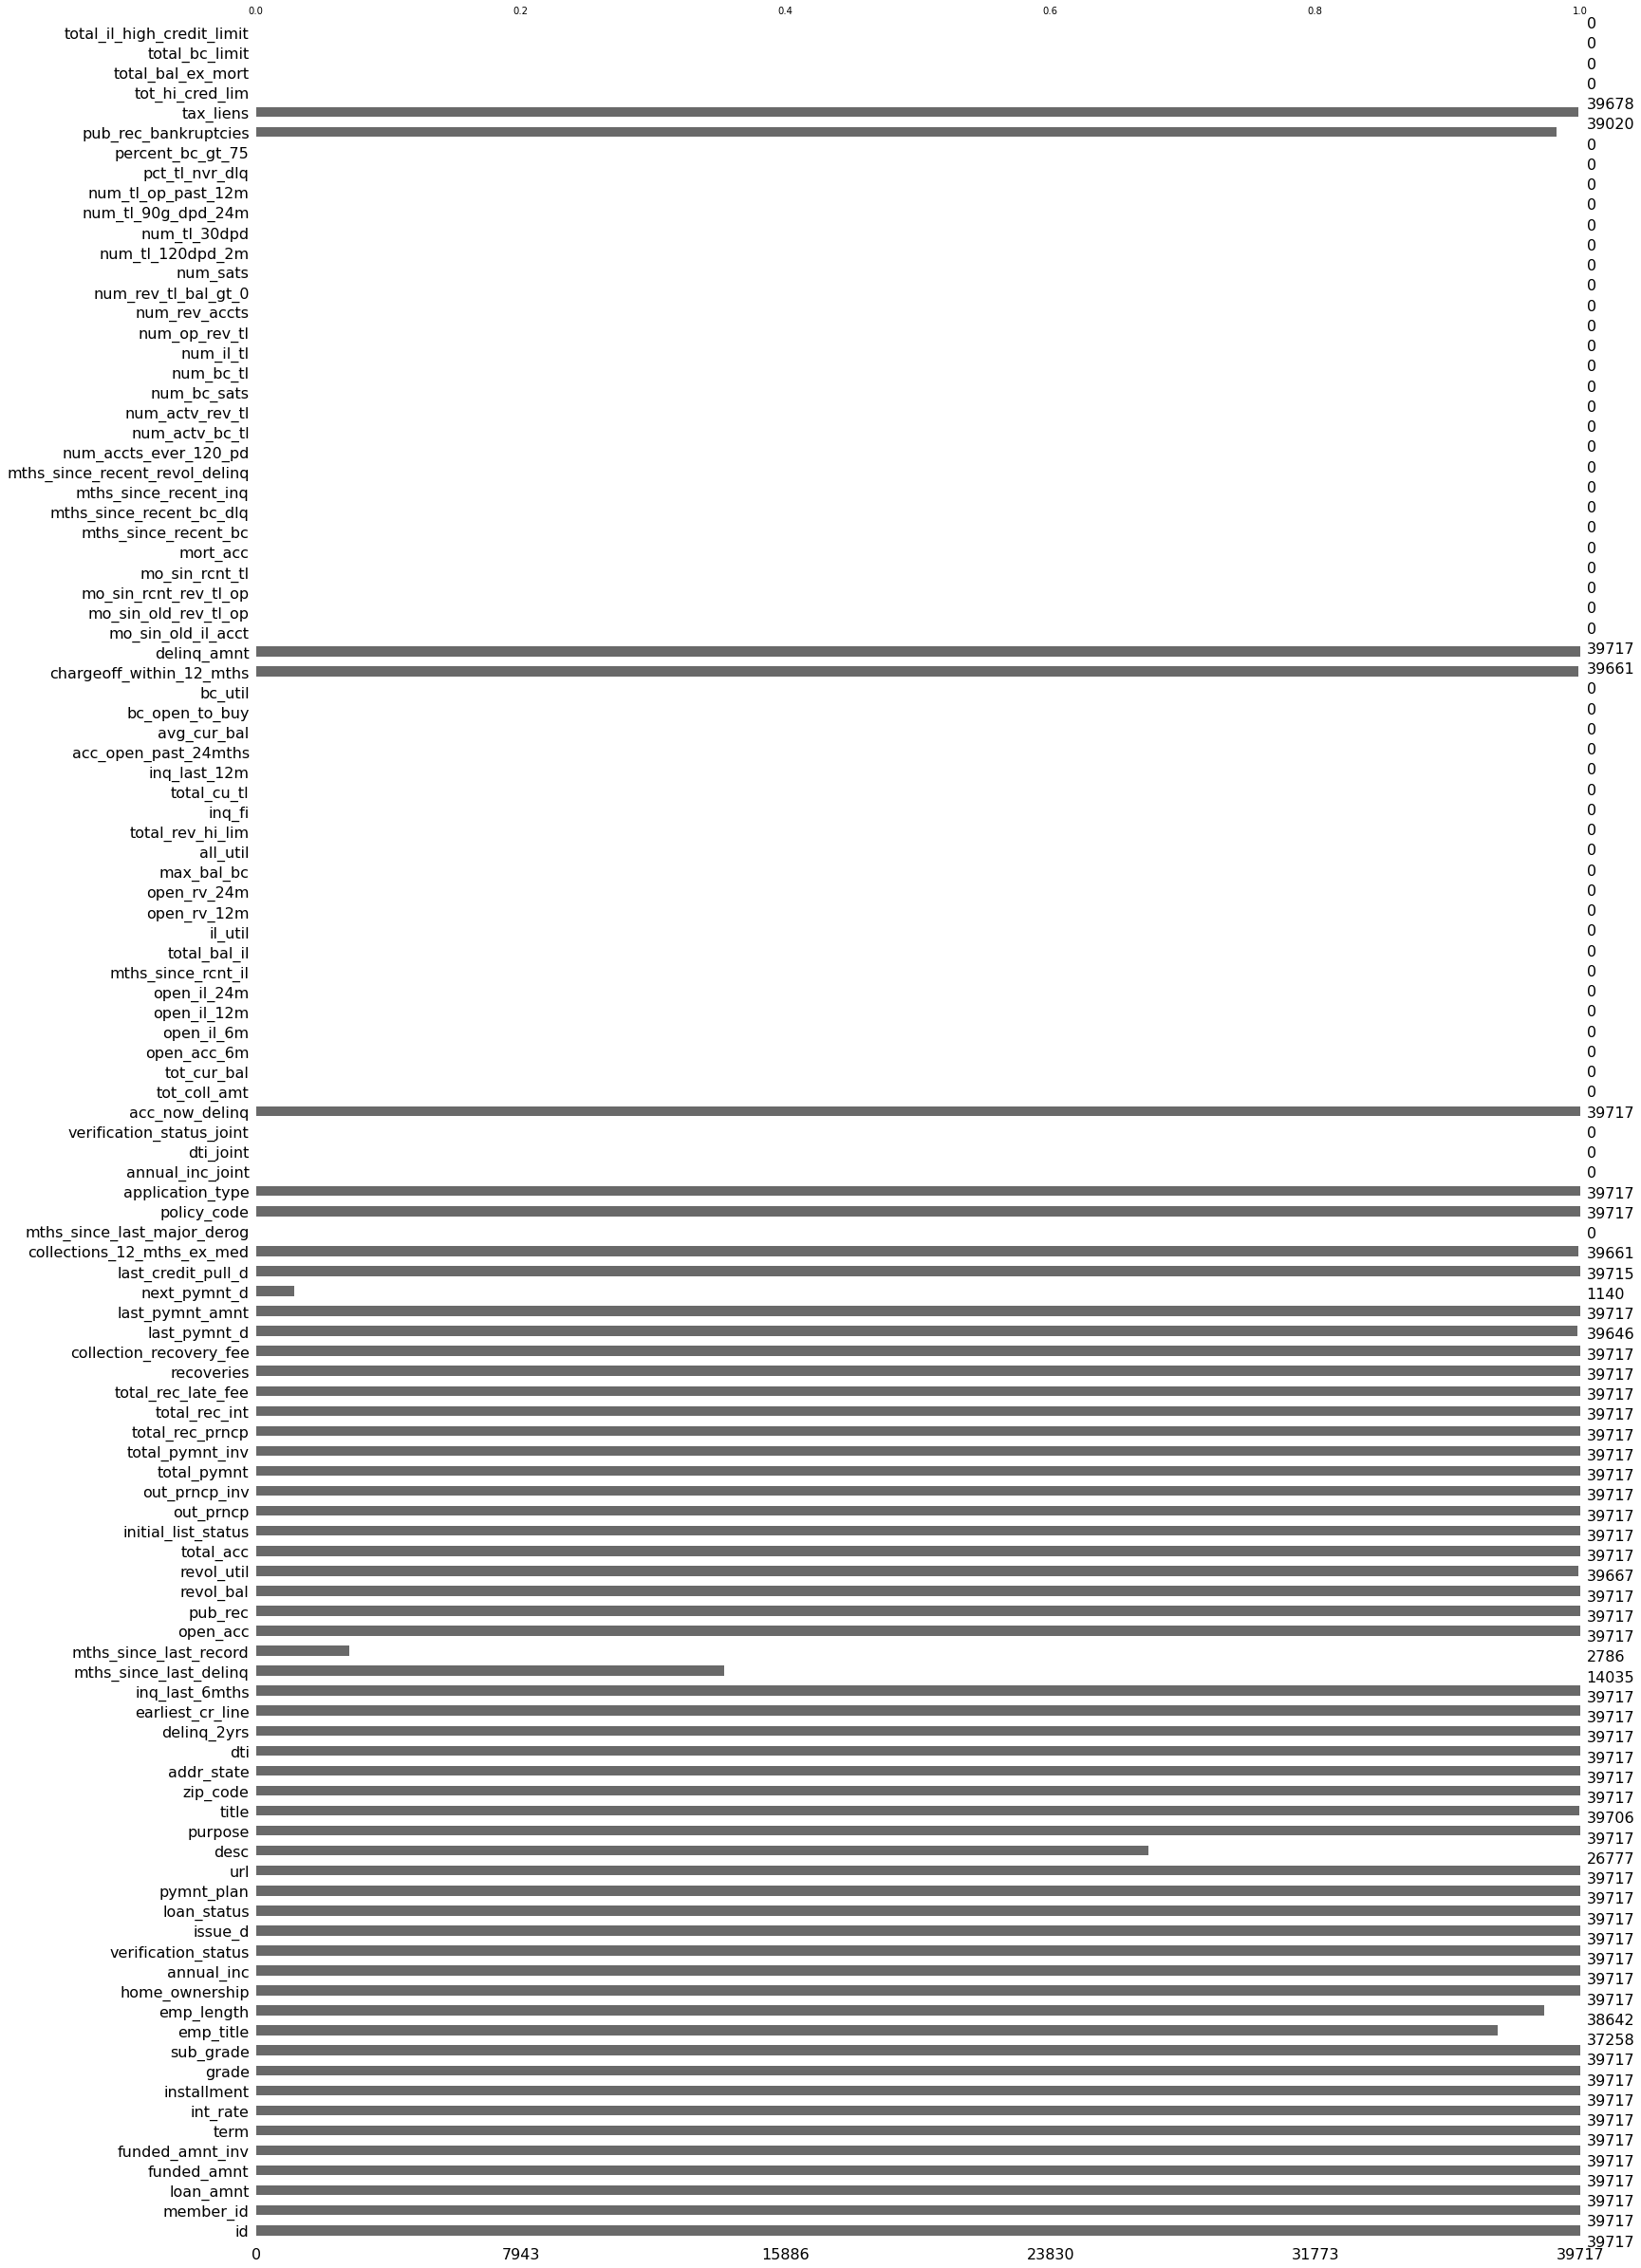

In [10]:
msno.bar(loan_df)

### In the above initial dataset chart we can see many columns having missing values

<AxesSubplot:>

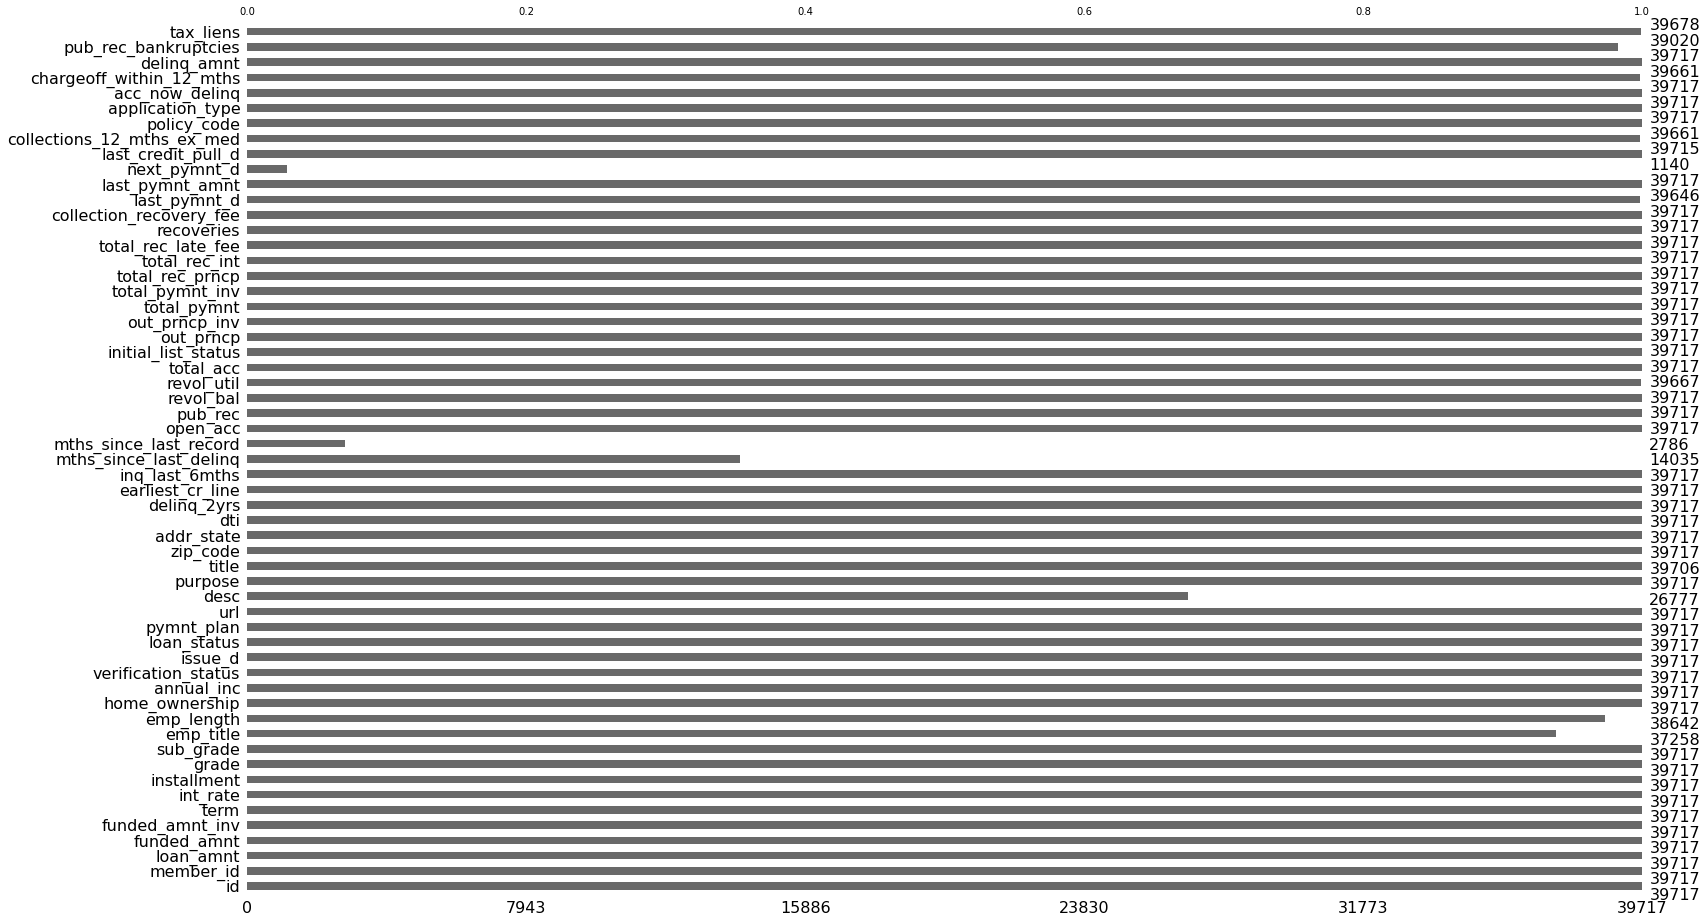

In [11]:
msno.bar(loan_df2)

### After clean up, In the above chart we can see most of the columns now having the data

<AxesSubplot:>

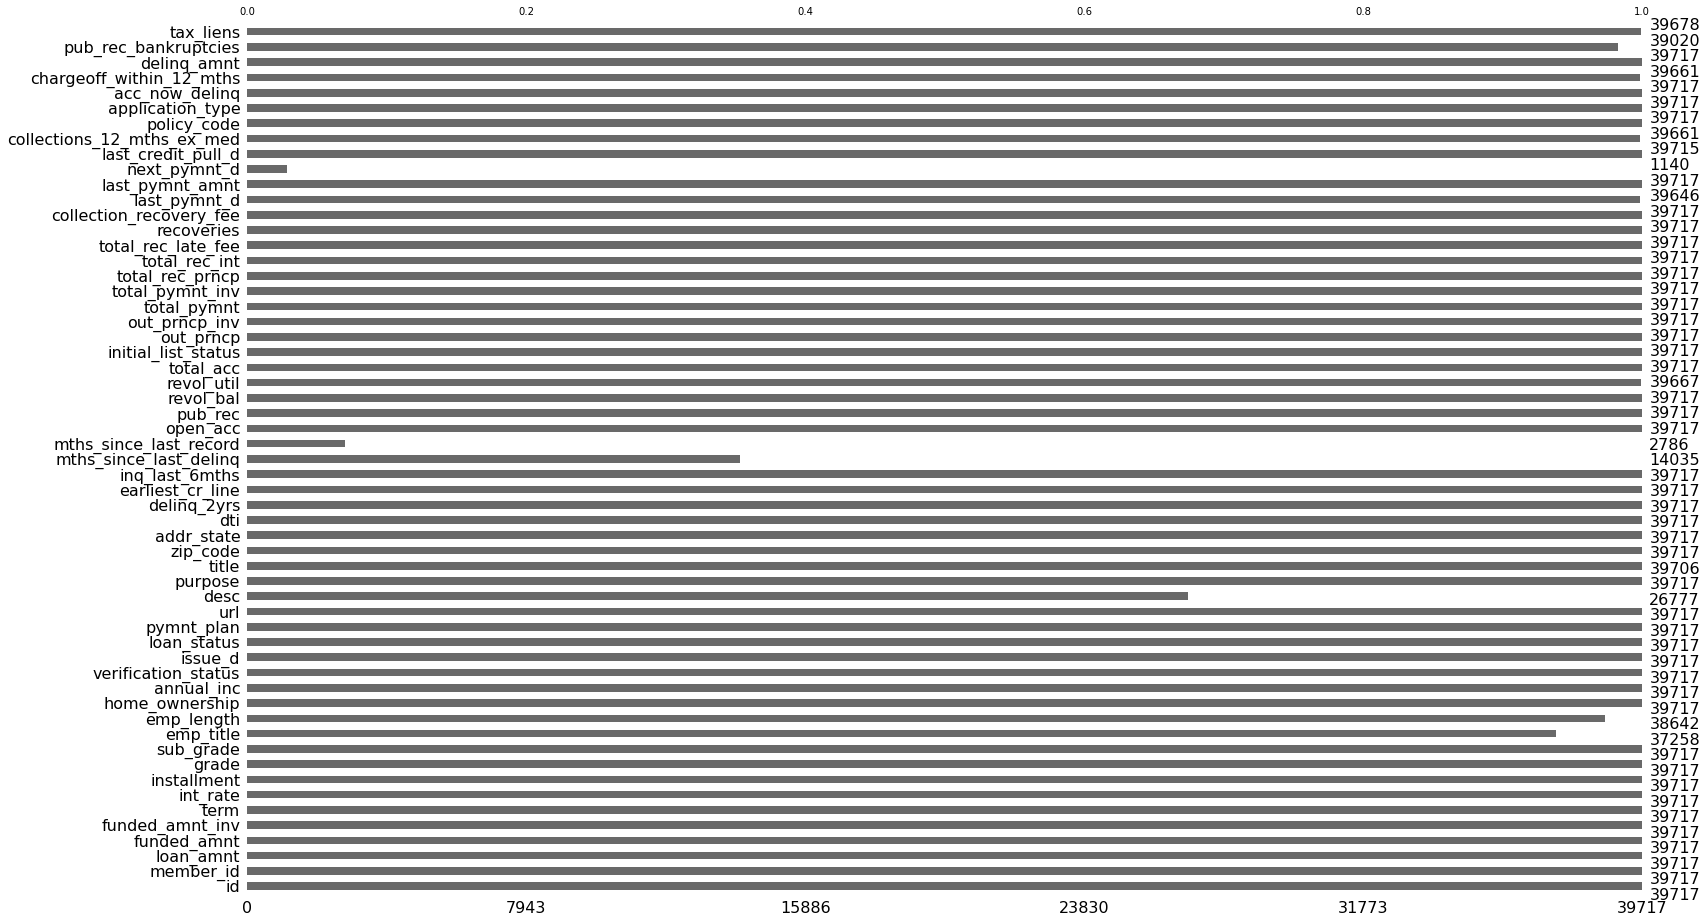

In [12]:
msno.bar(loan_df2)

### We can see that mostly data clean, however we still have few missing values. hence going with minimim 60% data availability check

In [13]:
missing_columns2 = loan_df2.columns[100*(loan_df2.isnull().sum()/len(loan_df2)) > 60 ]
print(missing_columns2)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d'], dtype='object')


In [14]:
loan_df2[['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']].head()

,mths_since_last_delinq,mths_since_last_record,next_pymnt_d
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,35.0,NaN,NaN
4,38.0,NaN,Jun-16


### Droping below three columns as well :
    'mths_since_last_delinq'
    'mths_since_last_record'
    'next_pymnt_d'

In [15]:
loan_df3 = loan_df2.drop(missing_columns2, axis=1)
print(loan_df.shape)
print(loan_df2.shape)
print(loan_df3.shape)

(39717, 111)
(39717, 57)
(39717, 54)


In [ ]:
msno.bar(loan_df3)

<AxesSubplot:>

In [ ]:
loan_df3['desc'].head()

### Desc field has comments, can be used for text analytics. not in current scope. hence taking out.

In [ ]:
loan_df4 = loan_df3.drop('desc', axis=1)
print(loan_df4.shape)

### Now check on Rows, if any row has more missing columns

In [ ]:
# max of missing columns in any rows 
max(loan_df4.isnull().sum(axis=1))

# Data Analysis..!

In [ ]:
loan_df4.info()
loan_df4.columns

### Converting the datatypes to required datatype
Interest rate to "Float"



In [ ]:
loan_df4['int_rate'] = loan_df4['int_rate'].str.rstrip('%').astype('float') / 100.0

In [ ]:
loan_df4.head()
df = loan_df4

## Univariant Analysis on important columns

### removing loan status - Current, as it is still on going. not be useful for the analysis

In [ ]:
df = df[df['loan_status'] != 'Current']

### creating new value field for loan status for the analysis. Fully paid is 0, Default is 1

In [ ]:
df['new_loan_status'] = df.apply(lambda x: 0 if x['loan_status'] == "Fully Paid" else 1, axis=1)
df['new_loan_status'] = df['new_loan_status'].astype('int')

In [ ]:
df.info()

### Identifing the fields for Univariant analysis. 

In [ ]:
Category_Fields = df.select_dtypes(include=['object']).columns
Category_Fields = Category_Fields[Category_Fields != 'emp_title']
Category_Fields = Category_Fields[Category_Fields != 'pymnt_plan']
Category_Fields = Category_Fields[Category_Fields != 'loan_status']
Category_Fields = Category_Fields[Category_Fields != 'issue_d']
Category_Fields = Category_Fields[Category_Fields != 'url']
Category_Fields = Category_Fields[Category_Fields != 'title']
Category_Fields = Category_Fields[Category_Fields != 'zip_code']
Category_Fields = Category_Fields[Category_Fields != 'earliest_cr_line']
Category_Fields = Category_Fields[Category_Fields != 'revol_util']
Category_Fields = Category_Fields[Category_Fields != 'initial_list_status']
Category_Fields = Category_Fields[Category_Fields != 'last_pymnt_d']
Category_Fields = Category_Fields[Category_Fields != 'last_credit_pull_d']
Category_Fields = Category_Fields[Category_Fields != 'application_type']


print (Category_Fields)

In [ ]:
def Cat_plot(catval):
    sns.barplot(x=catval, y='new_loan_status', data=df)
    plt.figure(figsize=(16, 6))
    #plt.show()

In [ ]:
for catval in Category_Fields:
    plt.figure(figsize=(16, 6))
    Cat_plot(catval)

### Analysis on time series fields
issue_d
last_pymnt_d


In [ ]:
df['issue_d'] = pd.to_datetime(df['issue_d'], format ='%b-%y')
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'], format ='%b-%y')
print (df['last_pymnt_d'].head())
print (df['issue_d'].head())

In [ ]:
def comb_plot1(plotval):
    fig = px.scatter(df, x="issue_d", y=plotval, color='new_loan_status')
    #fig.show()

In [ ]:
for plotval in Category_Fields:
    comb_plot1(plotval)

In [ ]:
def comb_plot2(plotval):
    fig = px.scatter(df, x="last_pymnt_d", y=plotval, color='new_loan_status')
    fig.show()

In [ ]:
for plotval in Category_Fields:
    comb_plot2(plotval)

In [ ]:
sns.barplot(x=df["issue_d"].dt.year, y=df['new_loan_status'])
plt.figure(figsize=(16, 6))
plt.show()

In [ ]:
sns.barplot(x=df["issue_d"].dt.month, y=df['new_loan_status']).set(xlabel='Month')
plt.figure(figsize=(16, 6))
plt.show()

In [ ]:
Numeric_fields = df.select_dtypes(include = ['int64','float64']).columns
Numeric_fields

In [ ]:
Numeric_fields = Numeric_fields[Numeric_fields != 'id']
Numeric_fields = Numeric_fields[Numeric_fields != 'member_id']
Numeric_fields = Numeric_fields[Numeric_fields != 'funded_amnt_inv']
Numeric_fields = Numeric_fields[Numeric_fields != 'total_acc']
Numeric_fields = Numeric_fields[Numeric_fields != 'total_rec_prncp']
Numeric_fields = Numeric_fields[Numeric_fields != 'total_rec_int']
Numeric_fields = Numeric_fields[Numeric_fields != 'total_rec_late_fee']
Numeric_fields = Numeric_fields[Numeric_fields != 'total_pymnt']
Numeric_fields = Numeric_fields[Numeric_fields != 'total_pymnt_inv']
Numeric_fields = Numeric_fields[Numeric_fields != 'loan_amnt']
Numeric_fields = Numeric_fields[Numeric_fields != 'funded_amnt']
Numeric_fields = Numeric_fields[Numeric_fields != 'int_rate']
Numeric_fields = Numeric_fields[Numeric_fields != 'dti']
Numeric_fields = Numeric_fields[Numeric_fields != 'revol_bal']
Numeric_fields = Numeric_fields[Numeric_fields != 'recoveries']
Numeric_fields = Numeric_fields[Numeric_fields != 'collection_recovery_fee']
Numeric_fields = Numeric_fields[Numeric_fields != 'installment']
Numeric_fields = Numeric_fields[Numeric_fields != 'annual_inc']
Numeric_fields

In [ ]:
Numeric_fields2 = ['loan_amnt','int_rate','dti']

In [ ]:
def num_plot1(numval):
    #fig = px.histogram(df, x=numval, color="new_loan_status",  hover_data=df.columns, histnorm='probability density' )
    fig = px.histogram(df, x=numval, color="new_loan_status",  hover_data=df.columns, barnorm='percent' )
    #fig.show()

In [ ]:
for numval in Numeric_fields2:
    num_plot1(numval)


In [ ]:
Numeric_fields3 = ['delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']

In [ ]:
for numval in Numeric_fields3:
    num_plot1(numval)


In [ ]:
pvt1 = df.pivot_table('loan_amnt', index=['home_ownership', 'purpose'], columns='new_loan_status',aggfunc='sum')

pvt2 = df.pivot_table('loan_amnt',index= 'purpose',columns='new_loan_status',aggfunc=['sum'])

pvt1.plot(kind="barh",stacked=True, figsize=(16,9)) 



In [ ]:
purpose_list = ['debt_consolidation','credit_card','home_improvement','other','small_business','major_purchase','car']
df['purpose2'] = df[df['purpose'].isin(purpose_list)].purpose
df['purpose2']

In [ ]:
pvt1.max()